In [2]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df = pd.read_csv('citrus.csv')
df.shape

(10000, 6)

In [5]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [7]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [8]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [10]:
df['name'] = df['name'].map({
    'orange': 0,
    'grapefruit':1
})

In [11]:
df.head()

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9


In [13]:
X = df.iloc[:,1:]
X.head()

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [16]:
y= df.iloc[:,0]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: name, dtype: int64

In [18]:
### Test data Seperation
#8:2
from sklearn.utils import shuffle
X, y = shuffle(X,y)
X.head(), y.head()

(      diameter  weight  red  green  blue
 1248      7.65  140.12  158     91     3
 6724     10.97  189.64  162     59    14
 3109      8.86  158.49  162     83     2
 6064     10.51  181.91  148     61    10
 1984      8.16  148.02  165     92    13,
 1248    0
 6724    1
 3109    0
 6064    1
 1984    0
 Name: name, dtype: int64)

In [25]:
num = len(X)/5*4
num = int(num)

In [26]:
X_train = X.iloc[:num, :]
X_test = X.iloc[num:, :]
y_train = y.iloc[:num]
y_test = y.iloc[num:]

print(X_train,X_test)
print(y_train,y_test)

      diameter  weight  red  green  blue
1248      7.65  140.12  158     91     3
6724     10.97  189.64  162     59    14
3109      8.86  158.49  162     83     2
6064     10.51  181.91  148     61    10
1984      8.16  148.02  165     92    13
...        ...     ...  ...    ...   ...
7602     11.51  198.39  154     66    20
309       6.56  123.79  158     74     8
7266     11.30  195.10  137     75    45
608       7.00  131.46  157     89     2
7839     11.67  200.74  155     68    24

[8000 rows x 5 columns]       diameter  weight  red  green  blue
88        5.73  113.63  151     86     2
5114      9.10  158.51  149     82    31
3967      9.50  168.45  163     86     2
2804      8.68  155.43  168     66    12
3034      8.81  157.64  137     90    23
...        ...     ...  ...    ...   ...
189       6.20  119.45  166     89     5
8969     12.50  213.19  153     70    15
8976     12.51  213.28  145     88    17
4601     10.25  179.09  165    102     2
9945     14.29  240.98  140     

In [ ]:
### 표준화

![](https://miro.medium.com/max/512/1*Ap_7t_-luGSaAVgc7kl7qA.png)

In [28]:
X.columns

Index(['diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [30]:
for col in X.columns:
    mu = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col]-mu)/std
X_train

C:\Users\023\AppData\Local\Temp\ipykernel_10976\2451701538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col]-mu)/std


,diameter,weight,red,green,blue
1248,-1.200293,-1.202431,0.397201,1.279199,-0.922727
6724,0.504515,0.493552,0.782342,-1.438368,0.287605
3109,-0.578963,-0.573287,0.782342,0.599807,-1.032757
6064,0.268306,0.228812,-0.565652,-1.268520,-0.152516
1984,-0.938410,-0.931868,1.071198,1.364123,0.177575
...,...,...,...,...,...
7602,0.781803,0.793226,0.012060,-0.843900,0.947786
309,-1.760004,-1.761708,0.397201,-0.164508,-0.372576
7266,0.673968,0.680549,-1.624791,-0.079584,3.698539
608,-1.534066,-1.499022,0.300916,1.109351,-1.032757


In [31]:
### 표준화 끝

In [32]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [34]:
X_train= X_train.values
X_test= X_test.values
y_train= y_train.values
y_test= y_test.values
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
## numpy 형태로 저장

In [62]:
def get_citrus():
    # 파일을 읽어온다.
    df = pd.read_csv('citrus.csv')
    
    df['name'] = df['name'].map({
    'orange': 0,
    'grapefruit':1
    })
    
    # X, y로 나눈다.
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    
    # 데이터를 섞어준다.
    X, y = shuffle(X,y)
    
    # 8:2로 나눈다.
    num = len(X)/5*4
    num = int(num)
    X_train= X.iloc[:num, :]
    X_test= X.iloc[num:, :]
    y_train= y.iloc[:num]
    y_test= y.iloc[num:]
    
    #표준화
    for col in X.columns:
        mu = X_train[col].mean()
        std = X_test[col].std()
        X_train[col] = (X_train[col]-mu)/std
        X_test[col] = (X_test[col]-mu)/std
        
    return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test = get_citrus()

C:\Users\023\AppData\Local\Temp\ipykernel_10976\1976796721.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col]-mu)/std
C:\Users\023\AppData\Local\Temp\ipykernel_10976\1976796721.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col]-mu)/std


In [64]:
#numpy 형태로 저장한다.
X_train= X_train.values
X_test= X_test.values
y_train= y_train.valuesF
y_test= y_test.values
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [65]:
#학습시키기
from sklearn.neighbors import KNeighborsClassifier

In [75]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [76]:
# 평가
clf.score(X_test,y_test)

0.92

In [77]:
clf.score(X_train,y_train)

0.934875

In [78]:
#예측
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [79]:
y_test

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [80]:
#예측 값의 정확도 계산

In [81]:
(y_pred == y_test).sum()/len(y_test)

0.92

In [84]:
#평가지표 metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [85]:
print_score(y_test, y_pred)

accuracy: 0.92
precision: 0.9127906976744186
recall: 0.9308300395256917


In [86]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm 

array([[898,  90],
       [ 70, 942]], dtype=int64)

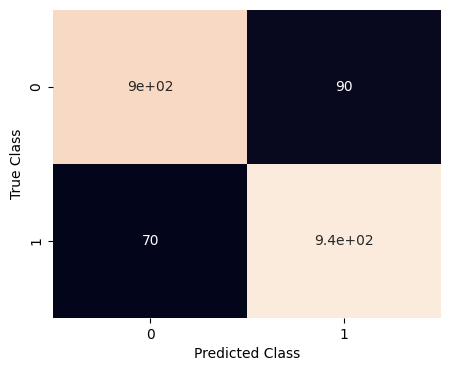

In [87]:
plt.figure(figsize=(5,4))
sns.heatmap(cfm, annot =True, cbar = False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()